In [1]:
## Import Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import nltk
from nltk import word_tokenize,sent_tokenize,TweetTokenizer,RegexpTokenizer



import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/mohittomar2008/Malignant-Comments-Classifier-Project/main/train.csv')
test=pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Malignant-Comments-Classifier-Project/main/test.csv")

In [3]:
train.shape  , test.shape

((159571, 8), (153164, 2))

In [4]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [6]:
train.iloc[0,1]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


In [11]:
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [12]:
test.dtypes

id              object
comment_text    object
dtype: object

### Null Values

In [13]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [14]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

<AxesSubplot:>

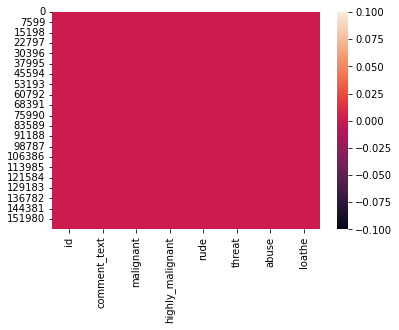

In [15]:
sns.heatmap(train.isnull())

## No Null vlaues present in train and test dataset

### Do we have any correlation within data

<AxesSubplot:>

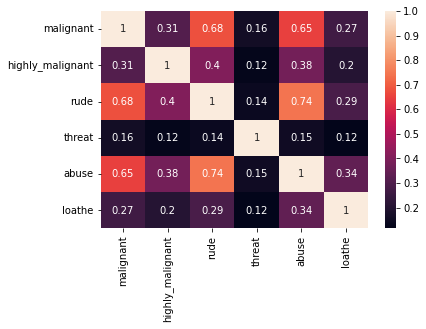

In [16]:
sns.heatmap(train.corr(),annot=True,linecolor='white')

In [17]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [18]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [19]:
## Lets jumple tha train dataset first

train=train.reindex(np.random.permutation(train.index))

In [20]:
# Read the target features

train['malignant'].value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

MALIGNANT
0    0.904156
1    0.095844
Name: malignant, dtype: float64


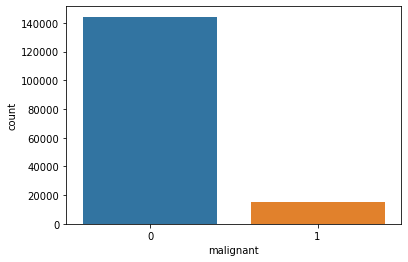

************************************************** 

**************************************************
HIGHLY_MALIGNANT
0    0.990004
1    0.009996
Name: highly_malignant, dtype: float64


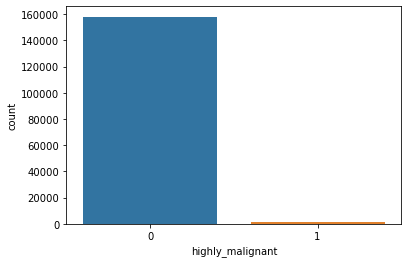

************************************************** 

**************************************************
RUDE
0    0.947052
1    0.052948
Name: rude, dtype: float64


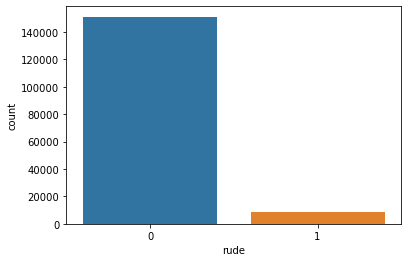

************************************************** 

**************************************************
THREAT
0    0.997004
1    0.002996
Name: threat, dtype: float64


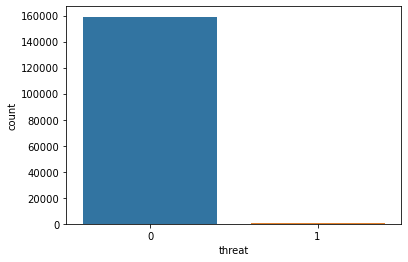

************************************************** 

**************************************************
ABUSE
0    0.950636
1    0.049364
Name: abuse, dtype: float64


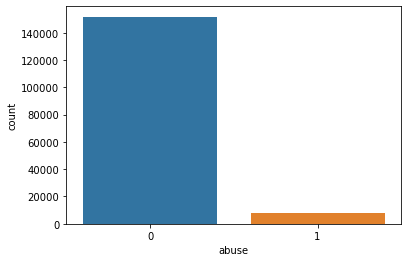

************************************************** 

**************************************************
LOATHE
0    0.991195
1    0.008805
Name: loathe, dtype: float64


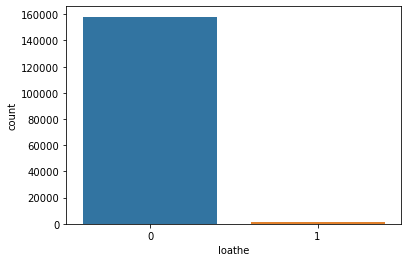

************************************************** 

**************************************************


In [21]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

for i in column:
    print(i.upper())
    print(train[i].value_counts(normalize=True))
    sns.countplot(train[i])
    plt.xlabel(i)
    plt.show()
    print('*'*50,'\n')
    print('*'*50)
   

In [22]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

train['malignant'].sum()

15294

In [23]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False)


,count
malignant,15294
rude,8449
abuse,7877
highly_malignant,1595
loathe,1405
threat,478


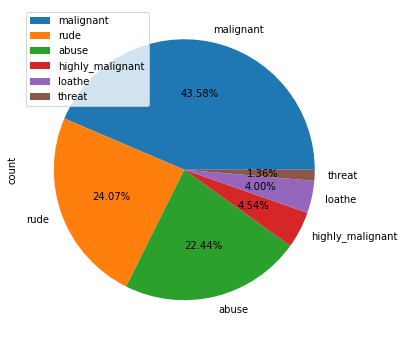

In [24]:
train[column].sum().to_frame(name='count').sort_values(by='count', ascending=False).plot.pie(y='count',autopct='%1.2f%%',figsize=(6,6)).legend(loc='upper left')

In [25]:
train['comment_text']

143835    Why do you spend so much time on wikipedia, yo...
97659     "But changing ""contend"" to ""say"" is cool. ...
85076     I'm think it is known by most people that digi...
23001                           heres the liknk from before
54230     Sorry, NPOV is non-negotiable. And you know th...
                                ...                        
39355     Thanks for the suggestion. I slept it over and...
152222    I also agree that with such closely related ar...
93313     Willmcw: Okay, but I don't undersatnd what you...
57624     Thank you for striking those comments. It's mu...
77421     Indeed. Anonymous editors are replacing images...
Name: comment_text, Length: 159571, dtype: object

In [26]:
# Length of comment

train['length']=train['comment_text'].str.len()

In [27]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
143835,0358e1462cf6e293,"Why do you spend so much time on wikipedia, yo...",0,0,0,0,0,0,130
97659,0a7527b3c38a99dc,"""But changing """"contend"""" to """"say"""" is cool. ...",0,0,0,0,0,0,119
85076,e3a388a7721d6d34,I'm think it is known by most people that digi...,0,0,0,0,0,0,223
23001,3ccd92240f66d07e,heres the liknk from before,0,0,0,0,0,0,27
54230,90e7aebc5bba949f,"Sorry, NPOV is non-negotiable. And you know th...",0,0,0,0,0,0,113


In [ ]:
## We will replace all email addresses within text into EMAIL

In [52]:
test="""My name is mohit tomer and my email is mohit.tomar@gmail.com """
import re
t=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',test)
t

'My name is mohit tomer and my email is EMAIL '

In [57]:
# ID feature all are unique values which will not help for any prediction. Drop it

train['id'].nunique() , train['id'].count()

(159571, 159571)

In [61]:
column=['malignant','highly_malignant','rude','threat','abuse','loathe']

target_data=train[column]
target_data.head(2)

,malignant,highly_malignant,rude,threat,abuse,loathe
143835,0,0,0,0,0,0
97659,0,0,0,0,0,0


In [62]:
train[column].sum(axis=1)

143835    0
97659     0
85076     0
23001     0
54230     0
         ..
39355     0
152222    0
93313     0
57624     0
77421     0
Length: 159571, dtype: int64

In [63]:
train['target']=train[column].sum(axis=1)

In [64]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,target
143835,0358e1462cf6e293,"Why do you spend so much time on wikipedia, yo...",0,0,0,0,0,0,130,0
97659,0a7527b3c38a99dc,"""But changing """"contend"""" to """"say"""" is cool. ...",0,0,0,0,0,0,119,0
85076,e3a388a7721d6d34,I'm think it is known by most people that digi...,0,0,0,0,0,0,223,0
23001,3ccd92240f66d07e,heres the liknk from before,0,0,0,0,0,0,27,0
54230,90e7aebc5bba949f,"Sorry, NPOV is non-negotiable. And you know th...",0,0,0,0,0,0,113,0


In [65]:
train['target'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: target, dtype: int64

In [72]:
train['target'].unique()

array([0, 1, 3, 2, 4, 5, 6], dtype=int64)

In [74]:
train['target'].dtype

dtype('bool')

In [76]:
train['target']=train['target']>0   # It saved boolean values into target feature
train['target']=train['target'].astype(int)

In [77]:
train.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,target
143835,0358e1462cf6e293,"Why do you spend so much time on wikipedia, yo...",0,0,0,0,0,0,130,0
97659,0a7527b3c38a99dc,"""But changing """"contend"""" to """"say"""" is cool. ...",0,0,0,0,0,0,119,0


In [78]:
train['target'].value_counts()

0    143346
1     16225
Name: target, dtype: int64

### Target Feature id the comment is Magligant or not

<AxesSubplot:xlabel='target', ylabel='count'>

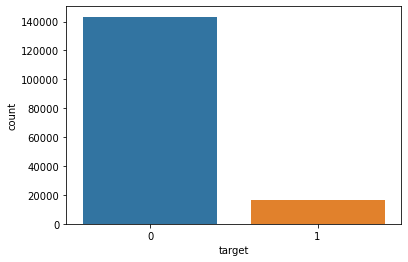

In [80]:
sns.countplot('target', data=train)

### Data Preprocessing of comment_text

In [81]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Bank of
[nltk_data]     America\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [83]:
# replace emailids to EMAIL, remove stop words and lemmatize

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer=PorterStemmer()
lemmit= WordNetLemmatizer()

In [86]:
corpus=[]

for i in range(len(train)):
    review=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',train['comment_text'][i])
    review=re.sub('[^a-zA-Z0-9]',' ',train['comment_text'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmit.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=" ".join(review)
    corpus.append(review)
    

In [88]:
corpus[0]

'explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired 89 205 38 27'

In [90]:
corpus[2]

'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info'

### Test- Preprocessing

In [ ]:
test_data=[]

for i in range(len(test)):
    review=re.sub('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','EMAIL',train['comment_text'][i])
    review=re.sub('[^a-zA-Z0-9]',' ',train['comment_text'][i])
    review=review.lower()
    review=review.split()
    
    review=[lemmit.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=" ".join(review)
    corpus.append(review)
    

In [93]:
corpus

['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired 89 205 38 27',
 'aww match background colour seemingly stuck thanks talk 21 51 january 11 2016 utc',
 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
 'make real suggestion improvement wondered section statistic later subsection type accident think reference may need tidying exact format ie date format etc later one else first preference formatting style reference want please let know appears backlog article review guess may delay reviewer turn listed relevant form eg wikipedia good article nomination transport',
 'sir hero chance remember page',
 'congratulation well use tool well talk',
 'cocksucker piss around work',
 'vandalism matt shirvington article reverted please banned',
 'sorry word nonsense offensive anyway intending write

# LETS CONVERT WORDS INTO VECTORS

### TF-IDF

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=10000)
X= tf.fit_transform(corpus).toarray()

In [95]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
y=train['target']
y

143835    0
97659     0
85076     0
23001     0
54230     0
         ..
39355     0
152222    0
93313     0
57624     0
77421     0
Name: target, Length: 159571, dtype: int32

In [101]:
# Train and Test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

MemoryError: Unable to allocate 9.51 GiB for an array with shape (127656, 10000) and data type float64